# **Transformers & Neural Networks: A Mini-Project Walkthrough**

------------------------------------------------------------------------------
# **Section 1: Introduction to Transformers**
------------------------------------------------------------------------------

What are Transformers?
Transformers are a type of neural network architecture that has revolutionized
the field of NLP. Introduced in the paper "Attention Is All You Need" by Vaswani et al. (2017), they excel at handling sequential data, like text.

Key characteristics:
 1. Parallel Processing: Unlike recurrent neural networks (RNNs) that process words sequentially, Transformers can process all words in a sequence simultaneously.
 2. Self-Attention Mechanism: This is the core innovation. It allows the model to weigh the importance of different words in a sequence when processing a particular word. This helps capture contextual relationships effectively.
 3. Encoder-Decoder Structure: Many Transformers (like the original) have an encoder to process the input sequence and a decoder to generate an output sequence   (e.g., for machine translation). Other models might use only the encoder (like BERT for classification/embedding) or only the decoder (like GPT for text generation).

# Why are they significant?
Transformers have led to state-of-the-art results in a wide range of NLP tasks, including:

* Machine Translation, Text Summarization, Question Answering, Sentiment Analysis, Text Generation, Named Entity Recognition

A transformer is a neural-network block that looks at every word in a passage at the same time and decides which other words matter most (self-attention) instead of stepping through one word after another. This “all-at-once” view makes training faster and lets the model notice long-range links such as “The cat that I saw yesterday was fluffy.” The design was introduced in “Attention Is All You Need”
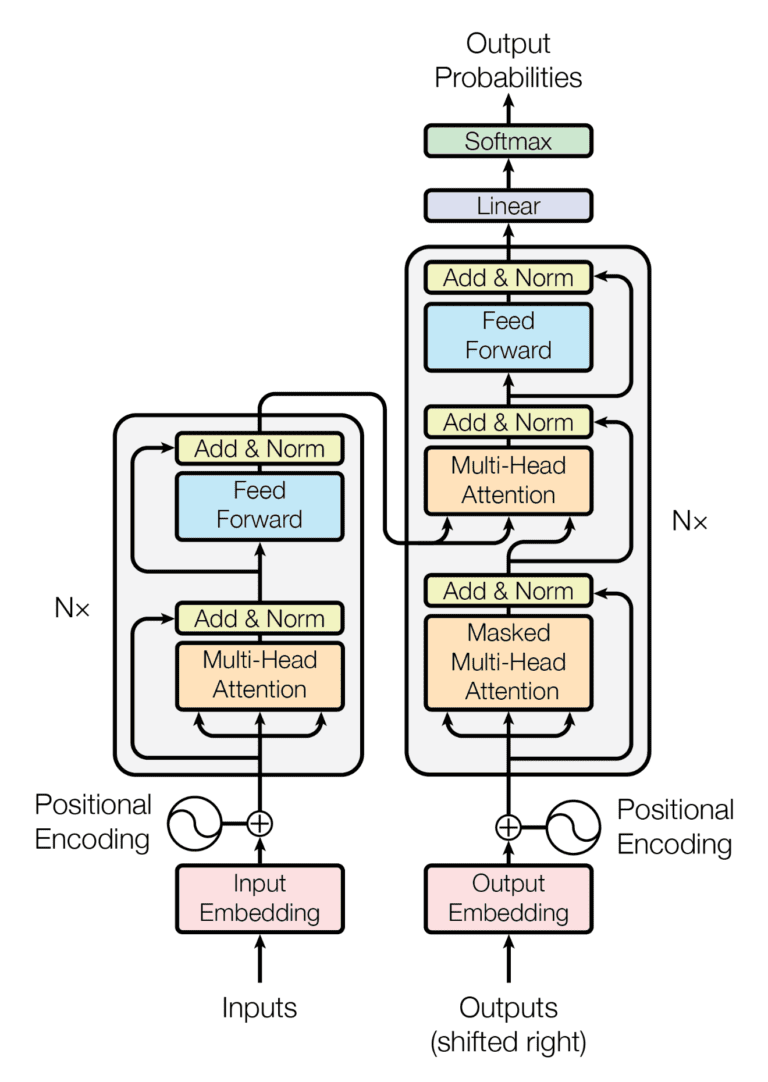


To begin working with transformer models in PyTorch, we import the required libraries. The torch library is used for tensor operations and building deep learning models, while transformers from Hugging Face provides pre-trained models and tokenizers.

In [ ]:
# !pip install transformers torch -q # Use this in a Colab cell
# AutoTokenizer provides a way to tokenize input text using pretrained models from Hugging Face
# AutoModel loads a pretrained transformer model (without task-specific heads like classification)
import torch
from transformers import AutoTokenizer, AutoModel

print("Libraries imported successfully!")

Libraries imported successfully!


# Quick Hugging Face demo


We are using **pipeline** in this demo. The pipeline in Hugging Face Transformers is a high-level API that allows users to quickly and easily perform a wide range of natural language processing (NLP) tasks with pretrained models — without needing to manually handle tokenization, model loading, or postprocessing. With just one line, the pipeline enables powerful, state-of-the-art language tasks using models like BERT, GPT-2, RoBERTa, T5, and more.

In [ ]:
# Using Hugging Face pipeline for a quick demo of sentiment analysis
from transformers import pipeline

# Lets start by creating a text classification pipeline using a pretrained DistilBERT sentiment model
# You can try changing the sentence or switching the pipeline to "text-generation" with "gpt2" and type your own prompts.
classifier = pipeline("text-classification",
                      model="distilbert-base-uncased-finetuned-sst-2-english")

print(classifier("I loved the new Spider-Man movie!"))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998629093170166}]


In [ ]:
#### Text Generation
generator = pipeline("text-generation", model="gpt2")
print(generator("In a future world ruled by AI,", max_length=30, num_return_sequences=1))

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "In a future world ruled by AI, we'd have to make sense of it all.\n\nOne of the things that really matters to me is that we need to make sense of it all. And that will require a lot of research.\n\nI want to talk to you about that. I want to talk to you about this thing called Artificial Intelligence. It's an incredibly exciting thing and one that I've always wanted to talk about.\n\nIt's a field that's been around for a while, and it's definitely changing as we move forward. The question is whether or not we're going to be able to make sense of it all.\n\nFor example, the question is what's going to be the next big breakthrough in AI? What will it take? And who will be the next big advance in these fields?\n\nI want to talk about the next big breakthrough in AI, the cognitive abilities that we have in the human brain. There are some important things now we can do to help us understand that.\n\nI want to talk about the next big breakthrough in cognitive abilities w

In [ ]:
## Named Entity Recognition(NER)

ner = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)
print(ner("Barack Obama was born in Hawaii and served as President of the United States."))


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': np.float32(0.9993106), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9994271), 'word': 'Hawaii', 'start': 25, 'end': 31}, {'entity_group': 'LOC', 'score': np.float32(0.99863535), 'word': 'United States', 'start': 63, 'end': 76}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
### Question Answering
qa = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
print(qa(question="Where was Barack Obama born?", context="Barack Obama was born in Hawaii."))


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


{'score': 0.9777411222457886, 'start': 25, 'end': 31, 'answer': 'Hawaii'}


In [ ]:
## Text summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
text = "The Eiffel Tower is one of the most iconic landmarks in Paris. Built in 1889, it was initially criticized but is now a global cultural icon."
print(summarizer(text, max_length=30, min_length=10, do_sample=False))


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


[{'summary_text': 'The Eiffel Tower is one of the most iconic landmarks in Paris. Built in 1889, it was initially criticized but is now a'}]


# **How about experimenting with a large language model (LLM)??**

In [ ]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab and Kaggle notebooks! Otherwise use pip install unsloth
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29 peft trl triton
    !pip install --no-deps cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
    !pip install --no-deps unsloth


In [ ]:
pip install -U bitsandbytes

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # We also uploaded 4bit for 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit", # New Mistral 12b 2x faster!
    "unsloth/mistral-7b-v0.3-bnb-4bit",        # Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x faster!
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B-bnb-4bit",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


    PyTorch 2.5.1+cu121 with CUDA 1201 (you have 2.6.0+cu124)
    Python  3.11.11 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.6.2: Fast Llama patching. Transformers: 4.52.4.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2025.6.2 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs       = examples["input"]
    outputs      = examples["output"]
    # instructions = examples["problem"]
    # inputs = examples["solution"]
    # outputs = examples["answer"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass


In [ ]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "Continue the fibonnaci sequence.", # instruction
        "1, 1, 2, 3, 5, 8", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nContinue the fibonnaci sequence.\n\n### Input:\n1, 1, 2, 3, 5, 8\n\n### Response:\n1, 1, 2, 3, 5, 8\n\n### Instruction:\nContinue the fibonnaci sequence.\n\n### Input:\n1, 1, 2, 3, 5, 8\n\n### Response:\n1, 1, 2, 3, 5,']

# Time for a mini-project

“Perceptron vs. Tiny Neural Net”

Goal: classify points in the classic make_moons dataset (non-linearly separable).

The **make_moons dataset** is a synthetic binary classification dataset commonly used to evaluate machine learning algorithms on non-linearly separable data. It consists of two interleaved half-circle ("moon-shaped") clusters of points in 2D space. Each sample has two numerical features (its x and y coordinates) and a binary class label (0 or 1), corresponding to which moon it belongs to. The dataset is ideal for testing models’ ability to learn non-linear decision boundaries.



In [ ]:
# Data loading
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch, torch.nn as nn, torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt


X, y = make_moons(n_samples=10000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Create a DataFrame to summarize the data
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df["Label"] = y
summary = df.describe(include='all')
print(summary)

# Plot the full dataset with class labels
plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.7)
plt.title("make_moons Dataset (n=10000, noise=0.2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

**Model: perceptron (single linear layer)**

A perceptron is the simplest type of neural network — a single-layer linear classifier.

Here, nn.Linear(2, 1) defines a perceptron with 2 input features (so no separate input layer; the input is passed directly), 1 output unit (producing a single logit for binary classification), no hidden layer. It applies a linear transformation.

**Why use a perceptron?**

It's fast and interpretable, and it serves as a baseline model in binary classification tasks. It works only when data is linearly separable.

In [ ]:
perceptron = nn.Linear(2, 1)
loss_fn     = nn.BCEWithLogitsLoss()
optimizer   = optim.SGD(perceptron.parameters(), lr=0.1) # Stochastic Gradient Descent optimizer

**Model: two-layer neural network (adds non-linearity)**

In [ ]:
mlp = nn.Sequential(
        nn.Linear(2, 8),
        nn.ReLU(),
        nn.Linear(8, 1))
optimizer_mlp = optim.Adam(mlp.parameters(), lr=0.01)


**Training loop**


Both of the model can use the same training loop

In [ ]:
def train(model, opt):
    for epoch in range(200):
        model.train()
        Xb = torch.tensor(X_train, dtype=torch.float32)
        yb = torch.tensor(y_train[:, None], dtype=torch.float32)
        opt.zero_grad()
        loss = loss_fn(model(Xb), yb)
        loss.backward(); opt.step()

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

def acc(model):
    model.eval()
    with torch.no_grad():
        preds = torch.sigmoid(torch.tensor(model(torch.tensor(X_test, dtype=torch.float32))))
    return accuracy_score(y_test, (preds.numpy() > 0.5).astype(int))

**Train the perceptron model**

In [ ]:
train(perceptron, optimizer)
print("Perceptron acc:", acc(perceptron))

**Train the tiny neural network model**

In [ ]:
train(mlp, optimizer_mlp)
print("MLP acc:", acc(mlp))

**Expected outcome: the perceptron hovers near 70 % because the classes aren’t linearly separable, while the tiny MLP easily exceeds 90 %**

**What to explore next?**

Change hidden-layer width or add another layer.

Swap ReLU for tanh and observe training speed.

Try a transformer encoder on the same vectors

In [ ]:
print("\nTutorial finished. Happy learning!")